# Section 1
In this section, we would like to visualize why using techniques of linear regression (using SSE cost function) fails in linear classification:

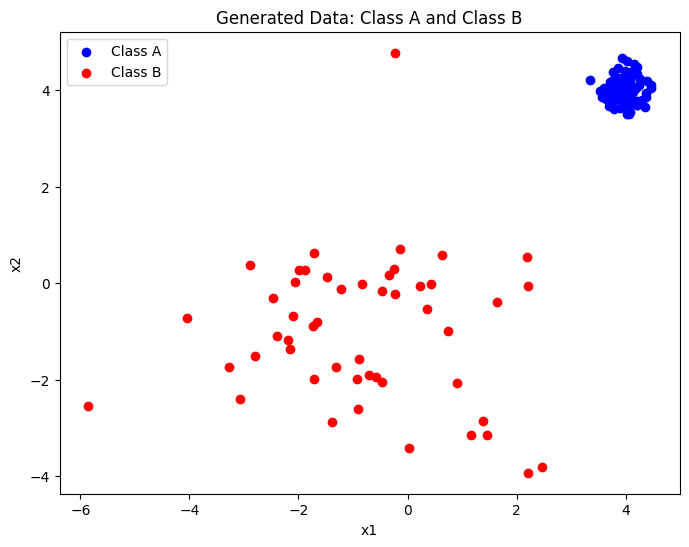

In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
class_A = np.random.normal(loc=(4, 4), scale=0.25, size=(100,2))
labels_A = np.ones(class_A.shape[0])

class_B = np.random.normal(loc=(-1, -1), scale=1.5, size=(50,2))
labels_B = np.zeros(class_B.shape[0])

X = np.vstack((class_A, class_B))
y = np.hstack((labels_A,labels_B))

plt.figure(figsize=(8, 6))
plt.scatter(class_A[:, 0], class_A[:, 1], label='Class A', color='blue')
plt.scatter(class_B[:, 0], class_B[:, 1], label='Class B', color='red')
plt.title("Generated Data: Class A and Class B")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()


As you can see, the points are linearly separable in my ways. Now let's fit a line to them:

Model weights: w1 = 0.08, w2 = 0.11, bias = 0.22 


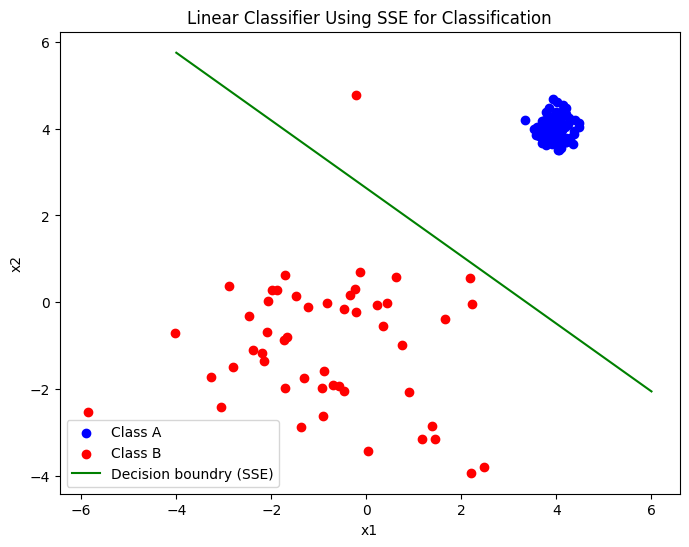

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

w1, w2 = model.coef_
w0 = model.intercept_

print(f"Model weights: w1 = {w1:.2f}, w2 = {w2:.2f}, bias = {w0:.2f} ")

#Plot the decision boundry: w1 * x1 + w2 * x2 + b = 0.5
x_vals = np.linspace(-4, 6, 100)
decision_boundry = (-w1 * x_vals - w0 + 0.5) / w2

plt.figure(figsize=(8,6))
plt.scatter(class_A[:,0] , class_A[:,1], label='Class A', color='blue')
plt.scatter(class_B[:,0] , class_B[:,1], label='Class B', color='red')
plt.plot(x_vals, decision_boundry, label='Decision boundry (SSE)', color='green')
plt.title("Linear Classifier Using SSE for Classification")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

Even the best fitted line fails to classify points. **Can you explain why?**